# Pattern Recognition

# Lucas Nogueira Ribeiro

## First exercise

In [9]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy as sc

mu = np.array([[3.0],[1.0],[2.0]])
mu.shape = (3,1) # Force mu to be a column vector

K = np.array([[0.5, 0.2, 0.1],
              [0.6, 0.18, 0.4],
              [0.1, 0.6, 0.2]])

x = np.array([[0],[0.5], [1]])
x.shape = (3,1)

### Util functions

In [2]:
def getPartitions(M):
    if not isinstance(M, np.ndarray):
        raise TypeError('O argumento M deve ser do tipo numpy.ndarray')
    
    if M.shape == (3,3):
        Maa = M[0:2, 0:2]
        Mbb = M[2,2]
        Mab = M[0:2,2]
        Mba = M[2,0:2]

        # Force Mab and Mba to be column and row vectors
        Mab.shape = (2,1)
        Mba.shape = (1,2)

        return Maa, Mbb, Mab, Mba
    elif M.shape == (3,1):
        Ma = M[0:2]
        Mb = M[2]

        # Force Ma to be a column vector
        Ma.shape = (2,1)

        return Ma, Mb
    else:
        raise Exception('Argumento M deve ser uma matriz de dimensões 3x3 ou 3x1.')

def getPrecision(C):
    return np.linalg.inv(C)

def getCondCov(C):
    Caa, Cbb, Cab, Cba = getPartitions(C)
    #iCbb = np.linalg.inv(Cbb)
    iCbb = 1.0/Cbb
    return Caa - np.dot(Cab, np.dot(iCbb, Cba))

def getCondMean(C, mu, x):
    Caa, Cbb, Cab, Cba = getPartitions(C)
    #iCbb = np.linalg.inv(Cbb)
    iCbb = 1.0/Cbb
    mu_a, mu_b = getPartitions(mu)  
    xa, xb = getPartitions(x)
    aux = np.dot(np.dot(Cab, iCbb),(xb - mu_b))
    aux.shape = (2,1)
    return mu_a + aux

def getCondProb(x, C):
    xa, xb = getPartitions(x)
    ma, mb = getPartitions(mu)
    P = getPrecision(C)
    Paa, Pbb, Pab, Pba = getPartitions(P)
    
    e_aa = -0.5*np.dot((xa - ma).T, np.dot(Paa, (xa - ma)))
    e_ab = -0.5*np.dot((xa - ma).T, np.dot(Pab, (xb - mb)))
    e_ba = -0.5*np.dot((xb - mb).T, np.dot(Pba, (xa - ma)))
    e_bb = -0.5*np.dot((xb - mb).T, np.dot(Pbb, (xb - mb)))
    
    e = e_aa - e_ab - e_ba - e_bb
    f = (1.0/((2*np.pi)**(3.0/2.0)))*1.0/(np.sqrt(np.linalg.det(C)))
    
    return f*np.exp(e)
        
def printInfo(C):
    # Calculate the partitions of the covariance matrix
    Caa, Cbb, Cab, Cba = getPartitions(C)
    print 'Caa:'
    print Caa
    print 'Cbb:'
    print Cbb
    print 'Cab:'
    print Cab
    print 'Cba:'
    print Cba

    # Calculate the partitions of the precision matrix
    P = getPrecision(C)
    Paa, Pbb, Pab, Pba = getPartitions(P)

    # Calculate the conditional covariance matrix
    condC = getCondCov(C)
    print 'condC:'
    print condC

    # Calculate the partitions of the mean vector
    mu_a, mu_b = getPartitions(mu)
    print 'mu:'
    print mu
    print 'mu_a:'
    print mu_a
    print 'mu_b:'
    print mu_b

    # Calculate the conditional mean vector
    condMean = getCondMean(C, mu, x)
    print 'condMean:'
    print condMean

    # Calculate the probability 
    prob = getCondProb(x, C)
    print 'prob: ', prob    

### First covariance matrix

In [3]:
# Build covariance matrix
k = 4.0
C1 = k * np.eye(3)
print 'C1:'
print C1

printInfo(C1)

C1:
[[ 4.  0.  0.]
 [ 0.  4.  0.]
 [ 0.  0.  4.]]
Caa:
[[ 4.  0.]
 [ 0.  4.]]
Cbb:
4.0
Cab:
[[ 0.]
 [ 0.]]
Cba:
[[ 0.  0.]]
condC:
[[ 4.  0.]
 [ 0.  4.]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
condMean:
[[ 3.]
 [ 1.]]
prob:  [[ 0.00282992]]


### Second covariance matrix

In [4]:
# Build covariance matrix
C2 = np.dot(K, K.T)
print 'C2:'
print C2

printInfo(C2)

C2:
[[ 0.3     0.376   0.19  ]
 [ 0.376   0.5524  0.248 ]
 [ 0.19    0.248   0.41  ]]
Caa:
[[ 0.3     0.376 ]
 [ 0.376   0.5524]]
Cbb:
0.41
Cab:
[[ 0.19 ]
 [ 0.248]]
Cba:
[[ 0.19   0.248]]
condC:
[[ 0.21195122  0.26107317]
 [ 0.26107317  0.40239024]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
condMean:
[[ 2.53658537]
 [ 0.39512195]]
prob:  [[  5.16316190e-39]]


### Thrid covariance matrix

In [5]:
# Build covariance matrix
C3 = np.zeros((3,3))

d = np.diag(C2)

for n in range(3):
    C3[n,n] = d[n]
    
print C3

printInfo(C3)

[[ 0.3     0.      0.    ]
 [ 0.      0.5524  0.    ]
 [ 0.      0.      0.41  ]]
Caa:
[[ 0.3     0.    ]
 [ 0.      0.5524]]
Cbb:
0.41
Cab:
[[ 0.]
 [ 0.]]
Cba:
[[ 0.  0.]]
condC:
[[ 0.3     0.    ]
 [ 0.      0.5524]]
mu:
[[ 3.]
 [ 1.]
 [ 2.]]
mu_a:
[[ 3.]
 [ 1.]]
mu_b:
[ 2.]
condMean:
[[ 3.]
 [ 1.]]
prob:  [[  2.01180803e-07]]


## Second exercise

$ \mathcal{N}(\mathbf{x}|\mathbf{\mu}, \mathbf{\Sigma}) = \frac{1}{(2\pi)^{D/2}}  \frac{1}{|\Sigma|^{1/2}}\exp^{-\frac{1}{2}(\mathbf{x}-\mathbf{\mu})^T \Sigma^{-1}(\mathbf{x}-\mathbf{\mu})}$

### First covariance matrix

In [6]:
Caa, Cbb, Cab, Cba = getPartitions(C1)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

iCbb = 1.0/Cbb
f = (1.0/((2*np.pi)**(3.0/2.0)))*1.0/(np.sqrt(np.linalg.det(C1)))
pb = f * np.exp(-0.5*np.dot((xb-mb).T, np.dot(iCbb, (xb-mb))))
print pb
print mb
print Cbb

0.00700411713073
[ 2.]
4.0


### Second covariance matrix

In [7]:
Caa, Cbb, Cab, Cba = getPartitions(C2)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

iCbb = 1.0/Cbb
f = (1.0/((2*np.pi)**(3.0/2.0)))*1.0/(np.sqrt(np.linalg.det(C2)))
pb = f * np.exp(-0.5*np.dot((xb-mb).T, np.dot(iCbb, (xb-mb))))
print pb
print mb
print Cbb

0.223799319618
[ 2.]
0.41


### Third covariance matrix

In [8]:
Caa, Cbb, Cab, Cba = getPartitions(C3)
ma, mb = getPartitions(mu)
xa, xb = getPartitions(x)

iCbb = 1.0/Cbb
f = (1.0/((2*np.pi)**(3.0/2.0)))*1.0/(np.sqrt(np.linalg.det(C3)))
pb = f * np.exp(-0.5*np.dot((xb-mb).T, np.dot(iCbb, (xb-mb))))
print pb
print mb
print Cbb

0.0719487726472
[ 2.]
0.41


## Third exercise

In [48]:
from scipy.special import gamma

def student(x, mu, lamb, upsilon):
    g = gamma(upsilon/2.0 + 0.5)/gamma(upsilon/2.0)
    l = np.sqrt(lamb/(np.pi*upsilon))
    f = (1 + (lamb*(x-mu)**2.0)/upsilon)**(-upsilon/2.0-0.5)
    return g*l*f

def gauss(x, mu, sigma):
    return (1.0/(np.sqrt(2*np.pi*sigma**2.0)))*np.exp((-1.0/(2*sigma**2.0))*(x-mu)**2.0)

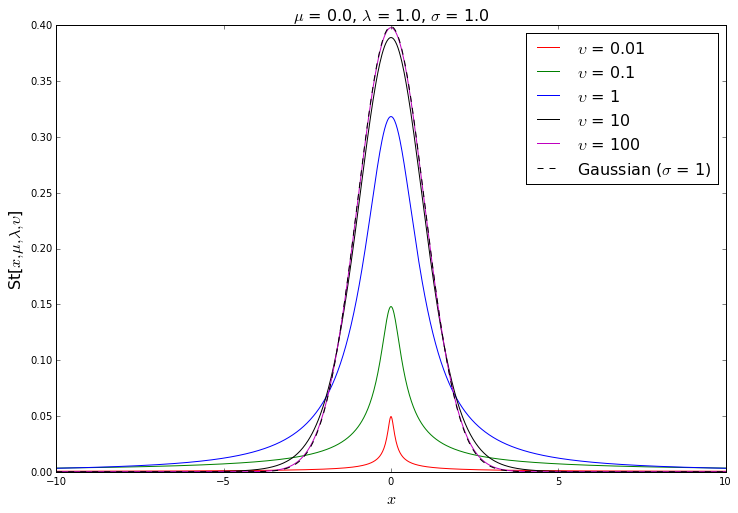

In [66]:
# plot parameters
mu = 0.0   
lamb = 1.0  # replace with 2.0 (weird curves ...)
sigma = 1.0
t = np.linspace(-10.0, 10.0, 1000)
upsilon_style_list = [(0.01,'r'), (0.1,'g'), (1, 'b'), (10,'k'), (100, 'm')]

pl.figure(figsize=(12,8), dpi=1000)

# plot student distributions
for upsilon, style in upsilon_style_list:
    y = [ student(x, mu, lamb, upsilon) for x in t]
    pl.plot(t, y, style)
    
# plot gaussian distribution    
g = [ gauss(x, mu, sigma) for x in t]
pl.plot(t, g, '--k')

# configure figure
pl.xlabel('$x$', fontsize=16)
pl.ylabel('St[$x,\mu,\lambda,\upsilon$]', fontsize=16)
pl.title('$\mu$ = {}, $\lambda$ = {}, $\sigma$ = {}'.format(mu, lamb, sigma), fontsize=16)
pl.legend(['$\upsilon$ = 0.01',
          '$\upsilon$ = 0.1',
          '$\upsilon$ = 1',
          '$\upsilon$ = 10',
          '$\upsilon$ = 100',
          'Gaussian ($\sigma$ = 1)'], fontsize=16)
